### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

def get_accuracy(predicted, actual):
    accuracy = (predicted == actual).sum() / len(actual) * 100
    return accuracy

def benchmark(classifier):
    from datetime import datetime
    time1 = datetime.now()
    cls = classifier()
    name = cls.__class__.__name__
    print("Training data using ", name)
    cls.fit(X_train, y_train)
    time2 = datetime.now()
    print("Time elapsed for training   = ", str(time2 - time1))
    predicted = cls.predict(X_test)
    time3 = datetime.now()
    print("Time elapsed for prediction = ", str(time3 - time2))
    print(f"Accuracy of {name} is {get_accuracy(predicted, y_test)}%")


In [3]:
print(X_train[0].shape)

(784,)


In [7]:
test_data_1 = X_train[0]
print(test_data_1)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

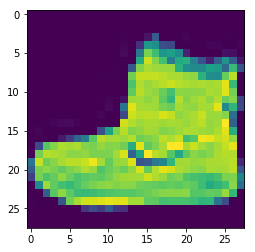

In [12]:
# As mentioned in README, all data are in 28x28 pixels
plt.imshow(test_data_1.reshape(28,28))
plt.show()

In [31]:
# Train the classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KeyboardInterrupt: 

In [23]:
original_label = y_test[0]
print("The original label is " , original_label)

predicted_label = neigh.predict([X_test[0]])
print("The predicted label is " , predicted_label)


The original label is  9
The predicted label is  [9]


In [53]:
from datetime import datetime
start = datetime.now()
predicted = neigh.predict(X_test)
end = datetime.now()
print(predicted)
print("Time elapsed is ", str(end - start))
    

[9 2 1 ..., 8 1 7]
Time elapsed is  0:11:33.454861


In [37]:
(predicted == y_test)


array([ True,  True,  True, ...,  True,  True, False], dtype=bool)

In [54]:
accuracy = (predicted == y_test).sum() / len(y_test)
print("Accuracy of KNeighbor(n=3) is ", (accuracy * 100))

Accuracy of KNeighbor(n=3) is  85.41


In [32]:
from sklearn.neighbors import KNeighborsClassifier
benchmark(KNeighborsClassifier)

Training data using  KNeighborsClassifier
Time elapsed for training   =  0:00:13.413656
Time elapsed for prediction =  0:11:20.999788
Accuracy of KNeighborsClassifier is 85.54%


In [27]:
from sklearn.tree import DecisionTreeClassifier
benchmark(DecisionTreeClassifier)

Training data using  DecisionTreeClassifier
Time elapsed for training   =  0:00:41.597725
Time elapsed for prediction =  0:00:00.017140
Accuracy of DecisionTreeClassifier is 78.96%


In [25]:
from sklearn.naive_bayes import GaussianNB
benchmark(GaussianNB)

Training data using  GaussianNB
Time elapsed for training   =  0:00:00.744469
Time elapsed for prediction =  0:00:00.831202
Accuracy of GaussianNB is 58.56%


In [26]:
from sklearn.neural_network import MLPClassifier
benchmark(MLPClassifier)

Training data using  MLPClassifier
Time elapsed for training   =  0:00:32.213279
Time elapsed for prediction =  0:00:00.061604
Accuracy of MLPClassifier is 84.73%


In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
benchmark(RandomForestClassifier)

Training data using  RandomForestClassifier
Time elapsed for training   =  0:00:08.361058
Time elapsed for prediction =  0:00:00.056093
Accuracy of RandomForestClassifier is 85.49%


In [30]:
benchmark(AdaBoostClassifier)

Training data using  AdaBoostClassifier
Time elapsed for training   =  0:01:44.138183
Time elapsed for prediction =  0:00:00.369755
Accuracy of AdaBoostClassifier is 54.25%


In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
benchmark(QuadraticDiscriminantAnalysis)

Training data using  QuadraticDiscriminantAnalysis


/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Time elapsed for training   =  0:00:07.624310
Time elapsed for prediction =  0:00:02.766923
Accuracy of QuadraticDiscriminantAnalysis is 56.42%
